In [2]:
import numpy as np
import pandas as pd

In [9]:
# Read the dataset:
dataset=pd.read_csv('Sample_Data.csv')

x1=dataset['x1'].tolist()
x2=dataset['x2'].tolist()
x3=dataset['x3'].tolist()
y=dataset['y'].tolist()

In [10]:
   x0 = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
   x1 = [73,93,89,96,73,53,69,47,87,79,69,70,93,79,70,93,78,81,88,78,82]
   x2 = [80,88,91,98,66,46,74,56,79,70,70,65,95,80,73,89,75,90,92,83,86]
   x3 = [75,93,90,100,70,55,77,60,90,88,73,74,91,73,78,96,68,93,86,77,90]
   y  = [152,185,180,196,142,101,149,115,175,164,141,141,184,152,148,192,147,183,177,159,177]

In [3]:
# Parameters
no_of_samples = m = len(x1)
no_of_features = 3
no_of_weights = no_of_features + 1
learning_rate = 0.0001

input_vector = np.array([x0,x1,x2,x3])
actual_output_vector = np.array([y])
cost_vector=[]
sample_weight_vector=[]
#weight_vector = np.full((1,no_of_weights),1)
weight_vector = np.array([0,0,0,0]).reshape(1,4)
prediction_vector = weight_vector.dot(input_vector)
error_vector = np.subtract(prediction_vector, actual_output_vector)

sum_squared_error = 0
for error_value in error_vector.T:
    sum_squared_error = sum_squared_error + (error_value*error_value)
cost = (1/m) * (1/2) * (sum_squared_error)
print("Cost = ",cost)
previous_cost=cost

gradient_matrix = error_vector.dot(input_vector.T)
multiplication_factor = (learning_rate/m)
weight_vector = np.subtract(weight_vector, multiplication_factor*gradient_matrix)

Cost =  [13094.85714286]


In [4]:
print("Training in progress")
while True:
    prediction_vector = weight_vector.dot(input_vector)
    error_vector = np.subtract(prediction_vector, actual_output_vector)

    sum_squared_error = 0
    for error_value in error_vector.T:
        sum_squared_error = sum_squared_error + (error_value*error_value)
    cost = (1/m) * (1/2) * (sum_squared_error)
    #print("cost = ",cost)
    
    cost_vector.append(cost)
    sample_weight_vector.append(weight_vector[0][2])
    
    if cost>previous_cost:
        break

    gradient_matrix = error_vector.dot(input_vector.T)
    multiplication_factor = (learning_rate/m)
    weight_vector = np.subtract(weight_vector, multiplication_factor*gradient_matrix)
    previous_cost=cost
    
print("Training Done")

Training in progress
Training Done


In [5]:
# Check the loss function
import matplotlib.pyplot as plt
plt.plot(sample_weight_vector,cost_vector,'ro')
plt.xlabel("weight")
plt.ylabel("Cost")
plt.show()

<Figure size 640x480 with 1 Axes>

In [6]:
previous_cost

array([1.92534648])

In [7]:
weight_vector

array([[-3.11576953,  0.42181307,  0.53020413,  1.09660699]])

In [8]:
# Predict:  86	82	89	175
print(-3.11576953+(86*0.42181307)+(82*0.53020413)+(89*1.09660699))

# Predict: 96	93	95	192
print(-3.11576953+(96*0.42181307)+(93*0.53020413)+(95*1.09660699))

174.23491525999998
190.86493332999999


In [30]:
# Generate all predicted values

import itertools
predicted_outputs=[]

def predict_output(x1,x2,x3):
    return (-3.11576953+(x1*0.42181307)+(x2*0.53020413)+(x3*1.09660699))
    

for x1_input,x2_input,x3_input in itertools.zip_longest(x1,x2,x3):
    predicted_output=predict_output(x1_input,x2_input,x3_input)
    predicted_outputs.append(predicted_output)

print("Predicted outputs are ",predicted_outputs)
print("Actual outputs are ",y)


Predicted outputs are  [152.33843923, 184.75525949000001, 181.36879863000001, 198.99898893, 139.43254646, 103.94309761, 149.66317615, 112.19729543999999, 174.16272293, 163.82316722, 143.15593167, 142.02333108, 186.27347442, 152.67610366999997, 150.65139208, 188.57528459, 144.120235, 180.75391091, 177.09076173, 158.23133094999997, 175.76508649]
Actual outputs are  [152, 185, 180, 196, 142, 101, 149, 115, 175, 164, 141, 141, 184, 152, 148, 192, 147, 183, 177, 159, 177]


In [21]:
# Calculate Accuracy:

from statistics import mean
percentage_errors = []

for predicted_value, actual_value in itertools.zip_longest(predicted_outputs,y):
    error=(np.abs(predicted_value-actual_value)/actual_value)*100
    percentage_errors.append(error)
    
average_percentage_error = mean(percentage_errors)
accuracy = 100-average_percentage_error

print("The Model is {}% accurate".format(accuracy))

The Model is 98.91594393129824% accurate


Text(0.5, 0, 'Output')

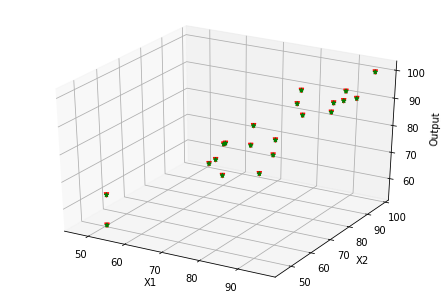

In [58]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(x1,x2,x3,y,marker='v',c='r',alpha=1)
ax.scatter(x1,x2,x3,predicted_outputs,marker='*',c='g',alpha=1)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Output')
